# Flight Delay Prediction

Predicting flight delay can help passengers and other stakeholders in great a way to better utilize their time or make different plans. Here a Kaggle dataset is used for such flight delay prediction (https://www.kaggle.com/divyansh22/flight-delay-prediction). The data is month of January from the Bureau of Transportation Statistics, Govt. of the USA. This dataset contains all the flights in the month of January 2019 and January 2020.

The following steps are followed in this project:
- Downloading a real-world dataset from a Kaggle competition
- Formulate the problem, understand the dataset description, and describe the modeling objective.
- Perform exploratory data analysis, gather insights, perform feature engineering, create a training, validation & test  split, and prepare the data for modeling.
- Train & evaluate different machine learning models, tune hyperparameters to improve models.
- Report the final performance of best model(s), show sample predictions, and save model weights. 
- Summary of the work, links to references, ideas for future work.

# Install Required Libraries

In [190]:
!pip install numpy pandas matplotlib seaborn --quiet

In [4]:
!pip install opendatasets xgboost graphviz lightgbm scikit-learn --upgrade --quiet

In [5]:
import numpy as np
import pandas as pd
import opendatasets as od
import os
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import os
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Download Dataset

The dataset can be downloaded from Kaggle directly within the Jupyter notebook using the opendatasets library. Kaggle credentials are to be provided for downloading.

In [7]:
od.download('https://www.kaggle.com/divyansh22/flight-delay-prediction')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yaswanthbandi
Your Kaggle Key: ········


100%|██████████| 22.9M/22.9M [00:03<00:00, 7.28MB/s]


In [8]:
os.listdir('flight-delay-prediction')

['Jan_2019_ontime.csv', 'Jan_2020_ontime.csv']

There are two 'csv' files for data from Jan 2019 and Jan 2020, now we can load the data into pandas dataframes.

In [9]:
jan_2019_df = pd.read_csv('./flight-delay-prediction/Jan_2019_ontime.csv')
jan_2020_df = pd.read_csv('./flight-delay-prediction/Jan_2020_ontime.csv')

In [10]:
jan_2019_df.head(5)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [11]:
jan_2020_df.head(5)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


Now we can combine the data from two dataframes into a new dataframe for further processing. Concatenation along row axis is done here.

In [12]:
raw_df = pd.concat(objs = [jan_2019_df, jan_2020_df], ignore_index = True)
raw_df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191326,31,5,9E,20363,9E,N331CA,4812,15412,1541205,TYS,11433,1143302,DTW,1002.0,1.0,0700-0759,1128.0,1.0,0.0,0.0,443.0,NaN
1191327,31,5,9E,20363,9E,N295PQ,4813,11433,1143302,DTW,12478,1247805,JFK,1747.0,0.0,1700-1759,1933.0,0.0,0.0,0.0,509.0,NaN
1191328,31,5,9E,20363,9E,N294PQ,4814,11996,1199603,GSP,12953,1295304,LGA,554.0,0.0,0600-0659,752.0,0.0,0.0,0.0,610.0,NaN
1191329,31,5,9E,20363,9E,N228PQ,4815,10397,1039707,ATL,15919,1591904,XNA,1714.0,0.0,1700-1759,1811.0,0.0,0.0,0.0,589.0,NaN


# Problem Statement 

Let's first check the columns of the dataset to get some quick idea and to decide on problem formulation.

### Dataset

There are 22 columns for the dataset and corresponding column description are given below.  
    
1. Day of Month
2. Day of Week starting from Monday
3. Unique Carrier Code. 
4. An identification number assigned by US DOT to identify a unique airline (carrier). 
5. Code assigned by IATA and commonly used to identify a carrier. 
6. Tail Number
7. Flight Number
8. Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.
9. Origin Airport, Airport Sequence ID. 
10. Origin Airport
11. Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.
12. Destination Airport, Airport Sequence ID. 
13. Destination Airport.
14. Actual Departure Time (local time: hhmm)
15. Departure Delay Indicator, 15 Minutes or More (1=Yes, 0=No)
16. Departure Time Block, Hourly Intervals
17. Actual Arrival Time (local time: hhmm)
18. Arrival Delay Indicator, 15 Minutes or More (1=Yes, 0=No)
19. Cancelled Flight Indicator (1=Yes, 0=No)
20. Diverted Flight Indicator (1=Yes, 0=No)
21. Distance between airports (miles)  
22. Unnamed: 21 - no description available  

### Problem Statement and Objective

From the description of columns one can find scope for many interesting problems such as flight cancellation prediction, flight departure delay prediction, flight arrival delay prediction, diverted flight prediction etc. Let's choose a problem of predicting flight delay on arrival.

> Our objective is to predict a flight delay of 15 mins or more at arrival airport. 

# Exploratory Data Analysis, Data Preprocessiong and Feature Engineering

## Data Cleaning and Preprocessing

At first we will look at a sample of the data.

In [13]:
raw_df.sample(15)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
103753,6,7,B6,20409,B6,N663JB,289,12478,1247805,JFK,13204,1320402,MCO,909.0,0.0,0900-0959,1128.0,0.0,0.0,0.0,944.0,NaN
439230,24,4,WN,19393,WN,N945WN,291,10397,1039707,ATL,13487,1348702,MSP,847.0,0.0,0800-0859,1014.0,0.0,0.0,0.0,907.0,NaN
134474,8,2,MQ,20398,MQ,N250NN,3984,13486,1348602,MSO,11298,1129806,DFW,1322.0,0.0,1300-1359,1722.0,0.0,0.0,0.0,1320.0,NaN
886996,16,4,AA,19805,AA,N519UW,901,14100,1410005,PHL,14122,1412202,PIT,2034.0,0.0,2000-2059,2147.0,0.0,0.0,0.0,268.0,NaN
200980,11,5,WN,19393,WN,N271LV,1424,14831,1483106,SJC,14679,1467903,SAN,1034.0,0.0,1000-1059,1155.0,0.0,0.0,0.0,417.0,NaN
842557,14,2,DL,19790,DL,N973DL,1924,10397,1039707,ATL,10821,1082106,BWI,2127.0,0.0,2100-2159,2308.0,0.0,0.0,0.0,577.0,NaN
675607,5,7,UA,19977,UA,N39415,824,12892,1289208,LAX,10721,1072102,BOS,814.0,0.0,0800-0859,1610.0,0.0,0.0,0.0,2611.0,NaN
635327,3,5,WN,19393,WN,N8576Z,1340,14747,1474703,SEA,13232,1323202,MDW,619.0,0.0,0600-0659,1156.0,0.0,0.0,0.0,1733.0,NaN
1134429,29,3,WN,19393,WN,N280WN,860,12391,1239103,ISP,10821,1082106,BWI,1654.0,0.0,1700-1759,1756.0,0.0,0.0,0.0,220.0,NaN
860850,15,3,UA,19977,UA,N652UA,2091,12266,1226603,IAH,12264,1226402,IAD,1211.0,0.0,1200-1259,1559.0,0.0,0.0,0.0,1190.0,NaN


From the data sample it can be observed that columns 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID' and 'OP_CARRIER' have perfectly correlated values. Similarly for 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID' and 'ORIGIN' values seems to be in correlation. The same is true for 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID' and 'DEST'.

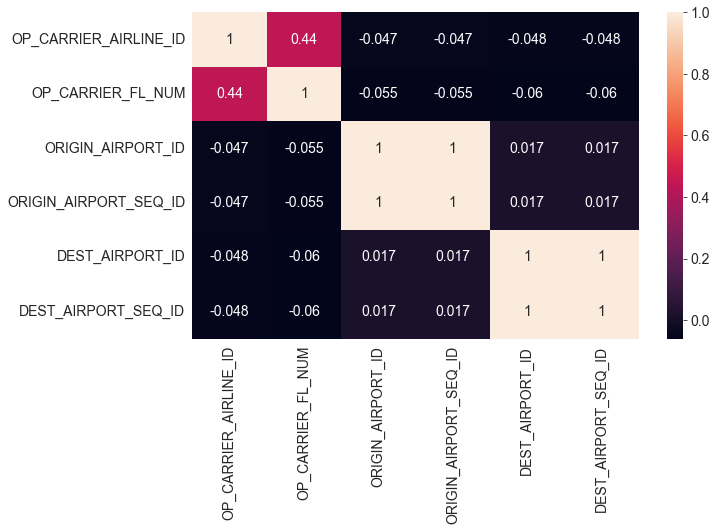

In [14]:
sns.heatmap(raw_df[['OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 
                    'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID']].corr(), annot = True );

The above heat map justifies our claim for 'ORIGIN_AIRPORT_ID' and 'ORIGIN_AIRPORT_SEQ_ID' to be perfectly correlated. The same is true for 'DEST_AIRPORT_ID' and 'DEST_AIRPORT_SEQ_ID'.

In [15]:
print(raw_df['ORIGIN_AIRPORT_ID'].value_counts())
print(raw_df['ORIGIN'].value_counts())

10397    63345
13930    51877
11298    47402
11057    39095
11292    38905
         ...  
14222       20
13983       18
10165       18
13829       17
10562       13
Name: ORIGIN_AIRPORT_ID, Length: 353, dtype: int64
ATL    63345
ORD    51877
DFW    47402
CLT    39095
DEN    38905
       ...  
PPG       20
OWB       18
ADK       18
OGD       17
BFM       13
Name: ORIGIN, Length: 353, dtype: int64


So out of 'ORIGIN_AIRPORT_ID', 'ORIGIN' and 'ORIGIN_AIRPORT_SEQ_ID' only one column is to be retained.

In [16]:
print(raw_df['DEST_AIRPORT_ID'].value_counts())
print(raw_df['DEST'].value_counts())

10397    63338
13930    51899
11298    47432
11057    39107
11292    38903
         ...  
14222       20
13983       18
10165       18
13829       17
10562       13
Name: DEST_AIRPORT_ID, Length: 353, dtype: int64
ATL    63338
ORD    51899
DFW    47432
CLT    39107
DEN    38903
       ...  
PPG       20
OWB       18
ADK       18
OGD       17
BFM       13
Name: DEST, Length: 353, dtype: int64


So out of the columns 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID' and 'DEST' only one is to be retained.

In [17]:
print(raw_df['OP_CARRIER'].value_counts())
print(raw_df['OP_UNIQUE_CARRIER'].value_counts())
print(raw_df['OP_CARRIER_AIRLINE_ID'].value_counts())

WN    221082
DL    153903
AA    153293
OO    136086
UA     95316
YX     54878
MQ     51899
B6     49152
OH     47478
9E     43266
AS     41854
YV     36182
NK     32699
EV     23759
F9     22114
G4     14537
HA     13833
Name: OP_CARRIER, dtype: int64
WN    221082
DL    153903
AA    153293
OO    136086
UA     95316
YX     54878
MQ     51899
B6     49152
OH     47478
9E     43266
AS     41854
YV     36182
NK     32699
EV     23759
F9     22114
G4     14537
HA     13833
Name: OP_UNIQUE_CARRIER, dtype: int64
19393    221082
19790    153903
19805    153293
20304    136086
19977     95316
20452     54878
20398     51899
20409     49152
20397     47478
20363     43266
19930     41854
20378     36182
20416     32699
20366     23759
20436     22114
20368     14537
19690     13833
Name: OP_CARRIER_AIRLINE_ID, dtype: int64


So out of 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID' and 'OP_CARRIER' only one column is to be retained

In [18]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191331 entries, 0 to 1191330
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DAY_OF_MONTH           1191331 non-null  int64  
 1   DAY_OF_WEEK            1191331 non-null  int64  
 2   OP_UNIQUE_CARRIER      1191331 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  1191331 non-null  int64  
 4   OP_CARRIER             1191331 non-null  object 
 5   TAIL_NUM               1188090 non-null  object 
 6   OP_CARRIER_FL_NUM      1191331 non-null  int64  
 7   ORIGIN_AIRPORT_ID      1191331 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  1191331 non-null  int64  
 9   ORIGIN                 1191331 non-null  object 
 10  DEST_AIRPORT_ID        1191331 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    1191331 non-null  int64  
 12  DEST                   1191331 non-null  object 
 13  DEP_TIME               1168315 non-null  float64
 14  DEP_DEL15         

There are 1191331 rows of data available. The column 'Unnamed: 21' has no entries and it is to be removed from data.

In [19]:
raw_df['CANCELLED'].value_counts()

0.0    1167677
1.0      23654
Name: CANCELLED, dtype: int64

In [20]:
raw_df['DIVERTED'].value_counts()

0.0    1188885
1.0       2446
Name: DIVERTED, dtype: int64

Since our aim is to identify flight delay on arrival we can delete the cancelled and diverted flight rows. Also they are less in number in comparison with total data.

In [21]:
raw_df = raw_df[raw_df['CANCELLED' ]!= 1.0]

In [22]:
raw_df = raw_df[raw_df['DIVERTED' ]!= 1.0]

In [23]:
raw_df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [24]:
raw_df.nunique()

DAY_OF_MONTH               31
DAY_OF_WEEK                 7
OP_UNIQUE_CARRIER          17
OP_CARRIER_AIRLINE_ID      17
OP_CARRIER                 17
TAIL_NUM                 5854
OP_CARRIER_FL_NUM        6997
ORIGIN_AIRPORT_ID         353
ORIGIN_AIRPORT_SEQ_ID     373
ORIGIN                    353
DEST_AIRPORT_ID           353
DEST_AIRPORT_SEQ_ID       373
DEST                      353
DEP_TIME                 1440
DEP_DEL15                   2
DEP_TIME_BLK               19
ARR_TIME                 1440
ARR_DEL15                   2
CANCELLED                   1
DIVERTED                    1
DISTANCE                 1511
Unnamed: 21                 0
dtype: int64

For our aim to predict flight delay on arrival, our target column is 'ARR_DEL15'. Avoiding highly correlated columns and columns with large number of categories and which we can assume less important such as 'TAIL_NUM' and 'OP_CARRIER_FL_NUM', we can select input columns. Also we cannot include actual arrival time as we are predicting arrival delay.

In [25]:
flight_df = raw_df[['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER', 'ORIGIN', 'DEST', 
                    'DEP_TIME', 'DEP_DEL15','DEP_TIME_BLK', 'DISTANCE', 'ARR_DEL15']].copy()

In [26]:
flight_df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,DISTANCE,ARR_DEL15
0,1,2,9E,GNV,ATL,601.0,0.0,0600-0659,300.0,0.0
1,1,2,9E,MSP,CVG,1359.0,0.0,1400-1459,596.0,0.0
2,1,2,9E,DTW,CVG,1215.0,0.0,1200-1259,229.0,0.0
3,1,2,9E,TLH,ATL,1521.0,0.0,1500-1559,223.0,0.0
4,1,2,9E,ATL,FSM,1847.0,0.0,1900-1959,579.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1191326,31,5,9E,TYS,DTW,1002.0,1.0,0700-0759,443.0,1.0
1191327,31,5,9E,DTW,JFK,1747.0,0.0,1700-1759,509.0,0.0
1191328,31,5,9E,GSP,LGA,554.0,0.0,0600-0659,610.0,0.0
1191329,31,5,9E,ATL,XNA,1714.0,0.0,1700-1759,589.0,0.0


In [27]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165231 entries, 0 to 1191330
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   DAY_OF_MONTH  1165231 non-null  int64  
 1   DAY_OF_WEEK   1165231 non-null  int64  
 2   OP_CARRIER    1165231 non-null  object 
 3   ORIGIN        1165231 non-null  object 
 4   DEST          1165231 non-null  object 
 5   DEP_TIME      1165231 non-null  float64
 6   DEP_DEL15     1165231 non-null  float64
 7   DEP_TIME_BLK  1165231 non-null  object 
 8   DISTANCE      1165231 non-null  float64
 9   ARR_DEL15     1165231 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 97.8+ MB


In [28]:
flight_df.isna().sum()

DAY_OF_MONTH    0
DAY_OF_WEEK     0
OP_CARRIER      0
ORIGIN          0
DEST            0
DEP_TIME        0
DEP_DEL15       0
DEP_TIME_BLK    0
DISTANCE        0
ARR_DEL15       0
dtype: int64

Now our dataframe has no null values.

## Exploratory Data Analysis

Now let's check the numeric columns of our dataframe.

In [29]:
flight_df.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DEL15,DISTANCE,ARR_DEL15
count,1.165231e+06,1.165231e+06,1.165231e+06,1.165231e+06,1.165231e+06,1.165231e+06
mean,1.590670e+01,3.894310e+00,1.331725e+03,1.542630e-01,8.010043e+02,1.609183e-01
std,8.989842e+00,1.916468e+00,4.962459e+02,3.612008e-01,5.902830e+02,3.674557e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00
25%,8.000000e+00,2.000000e+00,9.200000e+02,0.000000e+00,3.680000e+02,0.000000e+00
50%,1.600000e+01,4.000000e+00,1.327000e+03,0.000000e+00,6.410000e+02,0.000000e+00
75%,2.400000e+01,5.000000e+00,1.739000e+03,0.000000e+00,1.042000e+03,0.000000e+00
max,3.100000e+01,7.000000e+00,2.400000e+03,1.000000e+00,5.095000e+03,1.000000e+00


There seems no unreal values or outliers. Now we can explore the data for some insights.

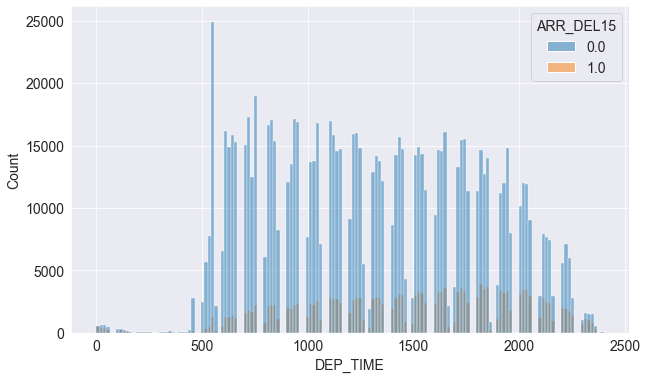

In [30]:
sns.histplot(x = 'DEP_TIME', data = flight_df, hue = 'ARR_DEL15');

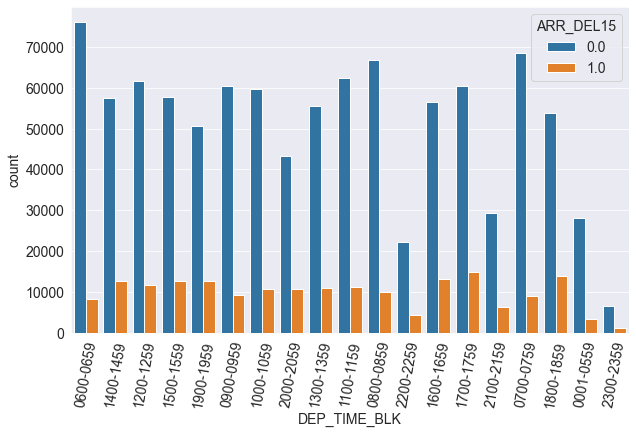

In [31]:
ax = sns.countplot(x = 'DEP_TIME_BLK', data = flight_df, hue = 'ARR_DEL15')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);

The arrival delay seems to be very little inclined towards midnight hours.

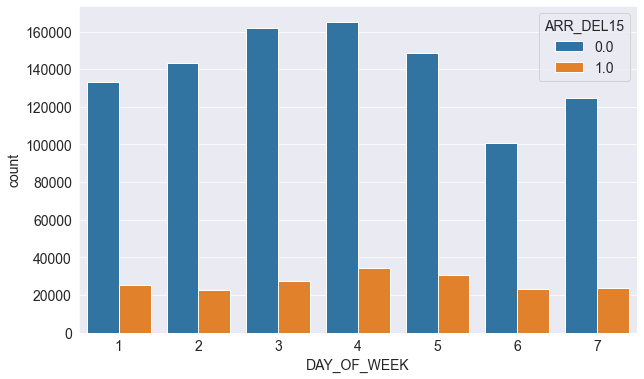

In [32]:
ax = sns.countplot(x = 'DAY_OF_WEEK', data = flight_df, hue = 'ARR_DEL15');

Weekend days (6 and 7) have less trips in total and relatively more delays.

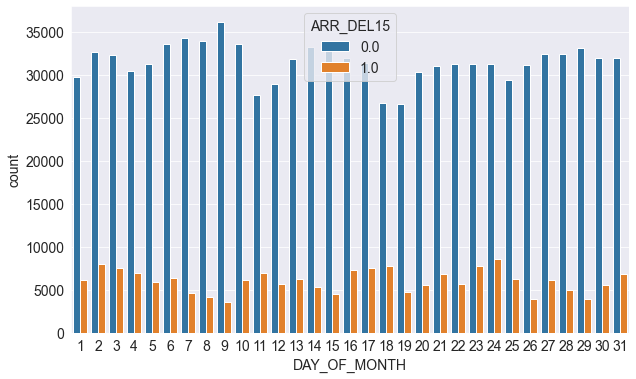

In [33]:
sns.countplot(x = 'DAY_OF_MONTH', data = flight_df, hue = 'ARR_DEL15');

We can see that the number of delayed flights does not vary in similar fashion to the total number of flights on a given day of the month.

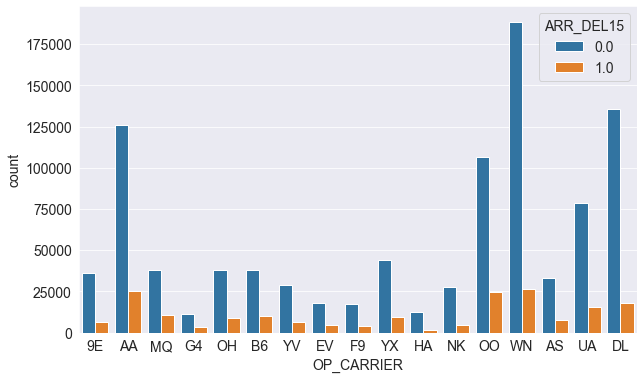

In [34]:
sns.countplot(x = 'OP_CARRIER', data = flight_df, hue = 'ARR_DEL15');

There is some variation among carriers in terms of total trips and delayed ones.

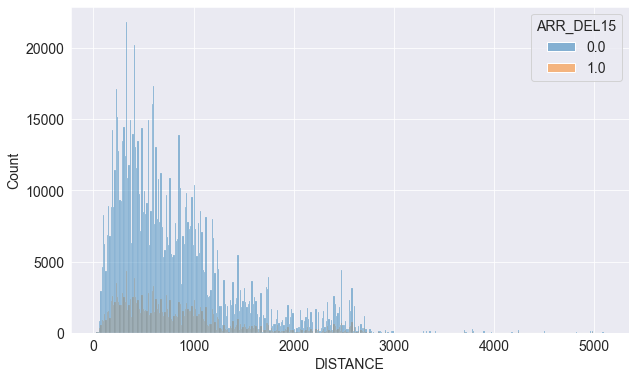

In [35]:
sns.histplot(x = 'DISTANCE', hue = 'ARR_DEL15', data = flight_df);

The above plot shows distance may also become an important feature for our problem.

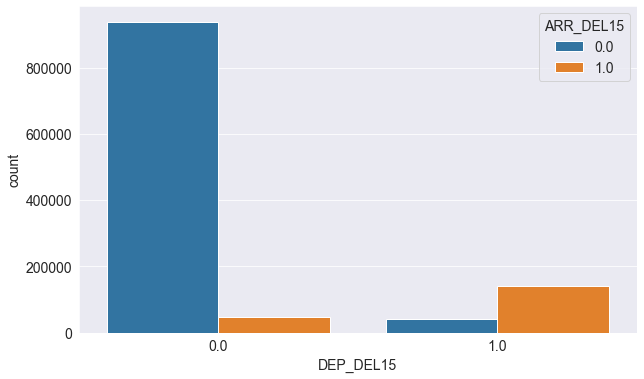

In [36]:
sns.countplot(x = 'DEP_DEL15', hue = 'ARR_DEL15', data = flight_df);

So the departure delay very much influence delay on arrival and the 'DEP_DEL15' will be a very important feature for our prediction problem.

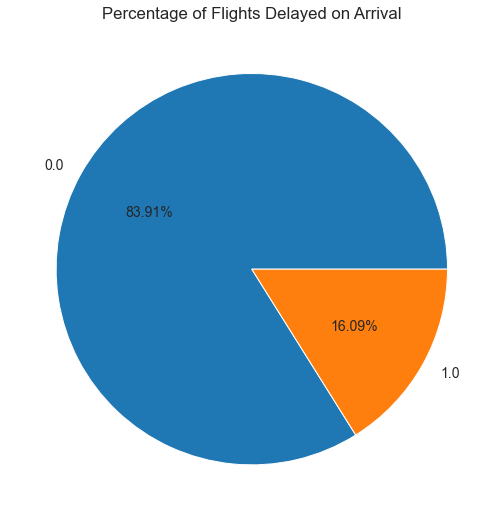

In [37]:
plt.figure(figsize = (9,9))
plt.title('Percentage of Flights Delayed on Arrival')
flight_count = flight_df['ARR_DEL15'].value_counts()
plt.pie(flight_count, labels = flight_count.index, autopct = '%1.2f%%');

So approximately 16% of data represent one class(delay on arrival) and 84% the other (no delay).

## Feature Engineering 

In [38]:
flight_df['ORIGIN'].nunique()

353

In [39]:
flight_df['DEST'].nunique()

353

We have 353 airports in total. Instead of feeding categorical variables of 353 each, we can think of some feature engineering. Let's group origin and destination airports based on delay at departure and arrival and use those as categorical variables.

In [40]:
percent_delay_origin = flight_df[flight_df['DEP_DEL15']== 1.0]['ORIGIN'].value_counts()/flight_df['ORIGIN'].value_counts()

In [41]:
percent_delay_origin

ABE    0.166176
ABI    0.166163
ABQ    0.106371
ABR    0.183333
ABY    0.089820
         ...   
WRG    0.168142
XNA    0.145199
XWA    0.238806
YAK    0.183673
YUM    0.109635
Name: ORIGIN, Length: 353, dtype: float64

In [42]:
percent_delay_origin.describe()

count    353.000000
mean       0.159340
std        0.055873
min        0.034682
25%        0.123067
50%        0.152306
75%        0.187320
max        0.411765
Name: ORIGIN, dtype: float64

In [43]:
flight_df.loc[:,'ORIGIN_CAT'] = 1

In [44]:
origin_cat_dict = {}  #Will be useful while making new input prediction

In [45]:
# insert categories for 'ORIGIN' in 'ORIGIN_CAT' column
for index, value in zip(percent_delay_origin.index, percent_delay_origin.values):
    if value < 0.05:
        origin_cat_dict[index] = 0
        flight_df.loc[flight_df['ORIGIN'] == index, 'ORIGIN_CAT'] = 0
    elif 0.05 <= value < 0.1:
        origin_cat_dict[index] = 1
        flight_df.loc[flight_df['ORIGIN'] == index, 'ORIGIN_CAT'] = 1
    elif 0.1 <= value < 0.15:
        origin_cat_dict[index] = 2
        flight_df.loc[flight_df['ORIGIN'] == index, 'ORIGIN_CAT'] = 2
    elif 0.15 <= value < 0.2:
        origin_cat_dict[index] = 3
        flight_df.loc[flight_df['ORIGIN'] == index, 'ORIGIN_CAT'] = 3
    elif 0.2 <= value < 0.25:
        origin_cat_dict[index] = 4
        flight_df.loc[flight_df['ORIGIN'] == index, 'ORIGIN_CAT'] = 4
    elif 0.25 <= value < 0.3:
        origin_cat_dict[index] = 5
        flight_df.loc[flight_df['ORIGIN'] == index, 'ORIGIN_CAT'] = 5
    elif 0.3 <= value < 0.35:
        origin_cat_dict[index] = 6
        flight_df.loc[flight_df['ORIGIN'] == index, 'ORIGIN_CAT'] = 6
    elif 0.35 <= value < 0.42:
        origin_cat_dict[index] = 7
        flight_df.loc[flight_df['ORIGIN'] == index, 'ORIGIN_CAT'] = 7

In [46]:
percent_delay_dest = flight_df[flight_df['ARR_DEL15']== 1.0]['DEST'].value_counts()/flight_df['DEST'].value_counts()
percent_delay_dest

ABE    0.174298
ABI    0.181818
ABQ    0.126912
ABR    0.200000
ABY    0.107784
         ...   
WRG    0.243243
XNA    0.162856
XWA    0.161290
YAK    0.247525
YUM    0.150000
Name: DEST, Length: 353, dtype: float64

In [47]:
percent_delay_dest.describe()

count    353.000000
mean       0.175805
std        0.054750
min        0.047244
25%        0.141176
50%        0.167407
75%        0.200535
max        0.353535
Name: DEST, dtype: float64

In [48]:
flight_df.loc[:, 'DEST_CAT'] = 1

In [49]:
dest_cat_dict = {} #Will be useful while making new input prediction

In [50]:
# insert categories for 'DEST' in 'DEST_CAT' column
for index, value in zip(percent_delay_dest.index, percent_delay_dest.values):
    if value < 0.05:
        dest_cat_dict[index] = 0
        flight_df.loc[flight_df['DEST'] == index, 'DEST_CAT'] = 0
    elif 0.05 <= value < 0.1:
        dest_cat_dict[index] = 1
        flight_df.loc[flight_df['DEST'] == index, 'DEST_CAT'] = 1
    elif 0.1 <= value < 0.15:
        dest_cat_dict[index] = 2
        flight_df.loc[flight_df['DEST'] == index, 'DEST_CAT'] = 2
    elif 0.15 <= value < 0.2:
        dest_cat_dict[index] = 3 
        flight_df.loc[flight_df['DEST'] == index, 'DEST_CAT'] = 3
    elif 0.2 <= value < 0.25:
        dest_cat_dict[index] = 4
        flight_df.loc[flight_df['DEST'] == index, 'DEST_CAT'] = 4
    elif 0.25 <= value < 0.3:
        dest_cat_dict[index] = 5
        flight_df.loc[flight_df['DEST'] == index, 'DEST_CAT'] = 5
    elif 0.3 <= value < 0.35:
        dest_cat_dict[index] = 6
        flight_df.loc[flight_df['DEST'] == index, 'DEST_CAT'] = 6
    elif 0.35 <= value < 0.40:
        dest_cat_dict[index] = 7
        flight_df.loc[flight_df['DEST'] == index, 'DEST_CAT'] = 7

In [51]:
flight_df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,DISTANCE,ARR_DEL15,ORIGIN_CAT,DEST_CAT
0,1,2,9E,GNV,ATL,601.0,0.0,0600-0659,300.0,0.0,2,2
1,1,2,9E,MSP,CVG,1359.0,0.0,1400-1459,596.0,0.0,2,3
2,1,2,9E,DTW,CVG,1215.0,0.0,1200-1259,229.0,0.0,2,3
3,1,2,9E,TLH,ATL,1521.0,0.0,1500-1559,223.0,0.0,2,2
4,1,2,9E,ATL,FSM,1847.0,0.0,1900-1959,579.0,0.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1191326,31,5,9E,TYS,DTW,1002.0,1.0,0700-0759,443.0,1.0,2,2
1191327,31,5,9E,DTW,JFK,1747.0,0.0,1700-1759,509.0,0.0,2,3
1191328,31,5,9E,GSP,LGA,554.0,0.0,0600-0659,610.0,0.0,2,5
1191329,31,5,9E,ATL,XNA,1714.0,0.0,1700-1759,589.0,0.0,2,3


## Split Data

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
train_val_df, test_df = train_test_split(flight_df, test_size = 0.2, shuffle = False)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, shuffle = False)

The data is split into 60% training, 20% validation and remaining 20% for testing. Shuffle set to False so that latest data comes for testing.

In [54]:
print('train_df size: ', train_df.shape)
print('val_df size: ', val_df.shape)
print('test_df size: ', test_df.shape)

train_df size:  (699138, 12)
val_df size:  (233046, 12)
test_df size:  (233047, 12)


Let's now select input columns, target columns and then choose numerical and categorical columns for further processing of data.

In [55]:
flight_df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER', 'ORIGIN', 'DEST',
       'DEP_TIME', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE', 'ARR_DEL15',
       'ORIGIN_CAT', 'DEST_CAT'],
      dtype='object')

In [56]:
input_cols =  ['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER', 'DEP_TIME', 'DEP_DEL15', 
               'DEP_TIME_BLK', 'DISTANCE', 'ORIGIN_CAT', 'DEST_CAT']
target_col = 'ARR_DEL15'

In [57]:
numeric_cols =  ['DAY_OF_MONTH','DEP_TIME', 'DISTANCE']
categorical_cols =  ['DAY_OF_WEEK', 'OP_CARRIER', 'DEP_DEL15', 'DEP_TIME_BLK', 'ORIGIN_CAT', 'DEST_CAT']

In [58]:
train_df[numeric_cols].describe()

,DAY_OF_MONTH,DEP_TIME,DISTANCE
count,699138.000000,699138.000000,699138.000000
mean,13.525677,1333.096670,807.287787
std,9.346128,497.526748,594.301082
min,1.000000,1.000000,31.000000
25%,5.000000,921.000000,369.000000
50%,12.000000,1328.000000,646.000000
75%,22.000000,1740.000000,1049.000000
max,31.000000,2400.000000,5095.000000


Choose inputs and targets for training, validation and testing.

In [59]:
train_inputs = train_df[input_cols].copy()
val_inputs = val_df[input_cols].copy()
test_inputs = test_df[input_cols].copy()

In [60]:
train_targets = train_df[target_col].copy()
val_targets = val_df[target_col].copy()
test_targets = test_df[target_col].copy()

In [61]:
train_inputs

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,DISTANCE,ORIGIN_CAT,DEST_CAT
0,1,2,9E,601.0,0.0,0600-0659,300.0,2,2
1,1,2,9E,1359.0,0.0,1400-1459,596.0,2,3
2,1,2,9E,1215.0,0.0,1200-1259,229.0,2,3
3,1,2,9E,1521.0,0.0,1500-1559,223.0,2,2
4,1,2,9E,1847.0,0.0,1900-1959,579.0,2,2
...,...,...,...,...,...,...,...,...,...
717944,7,2,9E,1928.0,1.0,1700-1759,296.0,4,3
717945,7,2,9E,2101.0,1.0,1900-1959,296.0,3,5
717946,7,2,9E,1725.0,0.0,1700-1759,752.0,3,3
717947,7,2,9E,1225.0,1.0,1100-1159,305.0,3,5


## Imputation

In [62]:
flight_df.isna().sum()

DAY_OF_MONTH    0
DAY_OF_WEEK     0
OP_CARRIER      0
ORIGIN          0
DEST            0
DEP_TIME        0
DEP_DEL15       0
DEP_TIME_BLK    0
DISTANCE        0
ARR_DEL15       0
ORIGIN_CAT      0
DEST_CAT        0
dtype: int64

Since there are no missing values, imputation is not required.

## Scaling Numeric Values

Now let's scale numeric values to the 0 to 1 range.

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler()

In [65]:
scaler.fit(flight_df[numeric_cols])

MinMaxScaler()

In [66]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [67]:
train_inputs[numeric_cols].describe()

,DAY_OF_MONTH,DEP_TIME,DISTANCE
count,699138.000000,699138.000000,699138.000000
mean,0.417523,0.555272,0.153295
std,0.311538,0.207389,0.117358
min,0.000000,0.000000,0.000000
25%,0.133333,0.383493,0.066746
50%,0.366667,0.553147,0.121445
75%,0.700000,0.724885,0.201027
max,1.000000,1.000000,1.000000


## Encoding Categorical Columns

In [68]:
from sklearn.preprocessing import OneHotEncoder

In [69]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore').fit(flight_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

C:\Users\Bandi Yaswanth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
len(encoded_cols)

61

In [71]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])

In [72]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [73]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [74]:
train_inputs

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,DISTANCE,ORIGIN_CAT,DEST_CAT,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,OP_CARRIER_9E,OP_CARRIER_AA,OP_CARRIER_AS,OP_CARRIER_B6,OP_CARRIER_DL,OP_CARRIER_EV,OP_CARRIER_F9,OP_CARRIER_G4,OP_CARRIER_HA,OP_CARRIER_MQ,OP_CARRIER_NK,OP_CARRIER_OH,OP_CARRIER_OO,OP_CARRIER_UA,OP_CARRIER_WN,OP_CARRIER_YV,OP_CARRIER_YX,DEP_DEL15_0.0,DEP_DEL15_1.0,DEP_TIME_BLK_0001-0559,DEP_TIME_BLK_0600-0659,DEP_TIME_BLK_0700-0759,DEP_TIME_BLK_0800-0859,DEP_TIME_BLK_0900-0959,DEP_TIME_BLK_1000-1059,DEP_TIME_BLK_1100-1159,DEP_TIME_BLK_1200-1259,DEP_TIME_BLK_1300-1359,DEP_TIME_BLK_1400-1459,DEP_TIME_BLK_1500-1559,DEP_TIME_BLK_1600-1659,DEP_TIME_BLK_1700-1759,DEP_TIME_BLK_1800-1859,DEP_TIME_BLK_1900-1959,DEP_TIME_BLK_2000-2059,DEP_TIME_BLK_2100-2159,DEP_TIME_BLK_2200-2259,DEP_TIME_BLK_2300-2359,ORIGIN_CAT_0,ORIGIN_CAT_1,ORIGIN_CAT_2,ORIGIN_CAT_3,ORIGIN_CAT_4,ORIGIN_CAT_5,ORIGIN_CAT_6,ORIGIN_CAT_7,DEST_CAT_0,DEST_CAT_1,DEST_CAT_2,DEST_CAT_3,DEST_CAT_4,DEST_CAT_5,DEST_CAT_6,DEST_CAT_7
0,0.0,2,9E,0.250104,0.0,0600-0659,0.053120,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2,9E,0.566069,0.0,1400-1459,0.111572,2,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,2,9E,0.506044,0.0,1200-1259,0.039100,2,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,2,9E,0.633597,0.0,1500-1559,0.037915,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2,9E,0.769487,0.0,1900-1959,0.108215,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717944,0.2,2,9E,0.803251,1.0,1700-1759,0.052330,4,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
717945,0.2,2,9E,0.875365,1.0,1900-1959,0.052330,3,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
717946,0.2,2,9E,0.718633,0.0,1700-1759,0.142378,3,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
717947,0.2,2,9E,0.510213,1.0,1100-1159,0.054107,3,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [75]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [76]:
X_train

,DAY_OF_MONTH,DEP_TIME,DISTANCE,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,OP_CARRIER_9E,OP_CARRIER_AA,OP_CARRIER_AS,OP_CARRIER_B6,OP_CARRIER_DL,OP_CARRIER_EV,OP_CARRIER_F9,OP_CARRIER_G4,OP_CARRIER_HA,OP_CARRIER_MQ,OP_CARRIER_NK,OP_CARRIER_OH,OP_CARRIER_OO,OP_CARRIER_UA,OP_CARRIER_WN,OP_CARRIER_YV,OP_CARRIER_YX,DEP_DEL15_0.0,DEP_DEL15_1.0,DEP_TIME_BLK_0001-0559,DEP_TIME_BLK_0600-0659,DEP_TIME_BLK_0700-0759,DEP_TIME_BLK_0800-0859,DEP_TIME_BLK_0900-0959,DEP_TIME_BLK_1000-1059,DEP_TIME_BLK_1100-1159,DEP_TIME_BLK_1200-1259,DEP_TIME_BLK_1300-1359,DEP_TIME_BLK_1400-1459,DEP_TIME_BLK_1500-1559,DEP_TIME_BLK_1600-1659,DEP_TIME_BLK_1700-1759,DEP_TIME_BLK_1800-1859,DEP_TIME_BLK_1900-1959,DEP_TIME_BLK_2000-2059,DEP_TIME_BLK_2100-2159,DEP_TIME_BLK_2200-2259,DEP_TIME_BLK_2300-2359,ORIGIN_CAT_0,ORIGIN_CAT_1,ORIGIN_CAT_2,ORIGIN_CAT_3,ORIGIN_CAT_4,ORIGIN_CAT_5,ORIGIN_CAT_6,ORIGIN_CAT_7,DEST_CAT_0,DEST_CAT_1,DEST_CAT_2,DEST_CAT_3,DEST_CAT_4,DEST_CAT_5,DEST_CAT_6,DEST_CAT_7
0,0.0,0.250104,0.053120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.566069,0.111572,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.506044,0.039100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.633597,0.037915,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.769487,0.108215,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717944,0.2,0.803251,0.052330,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
717945,0.2,0.875365,0.052330,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
717946,0.2,0.718633,0.142378,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
717947,0.2,0.510213,0.054107,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Models for Prediction

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

Here we will asses performance of models by accuracy_score (how accurate is the model in predicting classes correctly against its labels) and roc_auc_score (which is the are under Receiver Operating Characteristic Curve (ROC AUC) from prediction scores). This roc_auc_score measures separability of classes, that is how well the model is distinguishing classes. A maximum value for this score of 1 indicates model is perfectly distinguishing classes and a min 0 indicates model is worst. For datasets like the current one with different proportion of positive and negative classes, this metric is a very good estimate of models. our aim will be to maximize both accuracy_score and roc_auc_score.

In [78]:
# function to check performance of a model
def model_performance(model, X_train, y_train, X_val, y_val):
  model.fit(X_train, y_train)
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)
  train_accuracy = accuracy_score(y_train, train_preds)
  val_accuracy = accuracy_score(y_val, val_preds)
  print('Train set accuracy: {:.2f}%'.format(train_accuracy*100))
  print('Validation set Accuracy: {:.2f}%'.format(val_accuracy* 100))
  print('Validation Classification report: \n', classification_report(y_val, val_preds))
  print('roc auc score: {:.2f}'.format(roc_auc_score(y_val, val_preds)))  
  conf_matrix =  confusion_matrix(y_val, val_preds, normalize = 'true')
  plt.figure()
  plt.title('Validation Confusion Matrix')
  sns.heatmap(conf_matrix, annot = True)

## Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
model_lr = LogisticRegression(solver = 'liblinear', random_state = 42)

Train set accuracy: 91.66%
Validation set Accuracy: 92.78%
Validation Classification report: 
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96    196493
         1.0       0.78      0.75      0.76     36553

    accuracy                           0.93    233046
   macro avg       0.87      0.85      0.86    233046
weighted avg       0.93      0.93      0.93    233046

roc auc score: 0.85


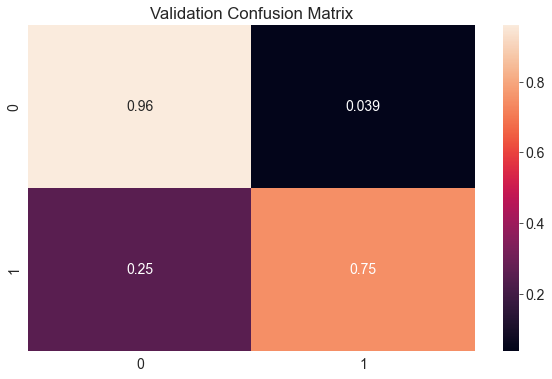

In [81]:
model_performance(model_lr, X_train, train_targets, X_val, val_targets)

The basic logistic regression model is able to give an accuracy of 92.78% on validation set. Let's compare this performance with a dump model.

In [82]:
# dump model
def all_ok_model(inputs):
  return np.full(len(inputs), 0)

In [83]:
print('Dump model Validation Accuracy: {:.2f}%'.format(accuracy_score(all_ok_model(val_targets), val_targets)*100))

Dump model Validation Accuracy: 84.32%


Logistic Regression's validation accuracy is much better thatn dump model's validation accuracy of 84.32%.

## Hyperparameter tuning for Logistic Regression

In [84]:
# function to quickly evaluate effect of different hyperparameters
def test_params_lr(**params):
    model = LogisticRegression(random_state=42, **params).fit(X_train, train_targets)
    train_accuracy = model.score(X_train, train_targets)
    val_accuracy = model.score(X_val, val_targets)
    roc_auc_score_lr = roc_auc_score(val_targets, model.predict(X_val))
    print('Train set accuracy: {:.2f}%'.format(train_accuracy*100))
    print('Validation set Accuracy: {:.2f}%'.format(val_accuracy* 100))
    print('roc auc score: {:.2f}'.format(roc_auc_score_lr)) 

Let's try different solvers.

In [85]:
test_params_lr(solver = 'sag')

Train set accuracy: 91.66%
Validation set Accuracy: 92.78%
roc auc score: 0.85


In [86]:
test_params_lr(max_iter = 500, solver = 'lbfgs') #not coverged in 100 iterations

Train set accuracy: 91.66%
Validation set Accuracy: 92.78%
roc auc score: 0.85


Now we trying changing number of iterations from default of 100, we use 'liblinear' solver.

In [87]:
test_params_lr(max_iter = 250, solver = 'liblinear')

Train set accuracy: 91.66%
Validation set Accuracy: 92.78%
roc auc score: 0.85


In [88]:
test_params_lr(max_iter = 500, solver = 'liblinear')

Train set accuracy: 91.66%
Validation set Accuracy: 92.78%
roc auc score: 0.85


In [89]:
test_params_lr(max_iter = 1000, solver = 'liblinear')

Train set accuracy: 91.66%
Validation set Accuracy: 92.78%
roc auc score: 0.85


No improvement is seen with changing these hyperparameters, let's keep the default model as best and explore other algorithms.

## Decision Tree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
model_dtc = DecisionTreeClassifier(random_state = 42)

Train set accuracy: 100.00%
Validation set Accuracy: 87.32%
Validation Classification report: 
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.92    196493
         1.0       0.59      0.64      0.61     36553

    accuracy                           0.87    233046
   macro avg       0.76      0.78      0.77    233046
weighted avg       0.88      0.87      0.88    233046

roc auc score: 0.78


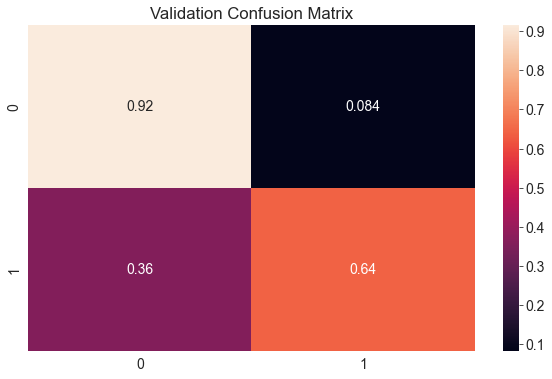

In [92]:
model_performance(model_dtc, X_train, train_targets, X_val, val_targets)

The basic Decision Tree Classifier is clearly overfitting the training data(train accuracy is 100%) and validation accuracy is less than that of Logistic Regression model we have seen earlier.

## Hyperparameter tuning for Decision Tree Classifier

In [93]:
# function to quickly evaluate effect of different hyperparameters
def test_params_dtc(**params):
    model = DecisionTreeClassifier(random_state=42, **params).fit(X_train, train_targets)
    train_accuracy = model.score(X_train, train_targets)
    val_accuracy = model.score(X_val, val_targets)
    roc_auc_score_lr = roc_auc_score(val_targets, model.predict(X_val))
    print('Train set accuracy: {:.2f}%'.format(train_accuracy*100))
    print('Validation set Accuracy: {:.2f}%'.format(val_accuracy* 100))
    print('roc auc score: {:.2f}'.format(roc_auc_score_lr))

We can first look at different max_depth values.

In [94]:
test_params_dtc(max_depth = 5)

Train set accuracy: 91.75%
Validation set Accuracy: 92.85%
roc auc score: 0.86


In [95]:
test_params_dtc(max_depth = 7)

Train set accuracy: 91.78%
Validation set Accuracy: 92.86%
roc auc score: 0.86


In [96]:
test_params_dtc(max_depth = 8)

Train set accuracy: 91.82%
Validation set Accuracy: 92.80%
roc auc score: 0.85


In [97]:
test_params_dtc(max_depth = 12)

Train set accuracy: 92.19%
Validation set Accuracy: 92.53%
roc auc score: 0.84


The max_depth = 7 seems to be the best value and model is not overfitting.

Now we can look at max_leaf_nodes.

In [98]:
test_params_dtc(max_leaf_nodes = 32)

Train set accuracy: 91.76%
Validation set Accuracy: 92.86%
roc auc score: 0.86


In [99]:
test_params_dtc(max_leaf_nodes = 64)

Train set accuracy: 91.78%
Validation set Accuracy: 92.89%
roc auc score: 0.86


In [100]:
test_params_dtc(max_leaf_nodes = 128)

Train set accuracy: 91.81%
Validation set Accuracy: 92.91%
roc auc score: 0.85


In [101]:
test_params_dtc(max_leaf_nodes = 256)

Train set accuracy: 91.86%
Validation set Accuracy: 92.67%
roc auc score: 0.85


128 number of leaf nodes is found as best number and more importantly the model is not overfitting.

We can also check for some values for min_samples_split and min_samples_leaf.

In [102]:
test_params_dtc(max_depth = 7, min_samples_split = 4)

Train set accuracy: 91.78%
Validation set Accuracy: 92.86%
roc auc score: 0.86


In [103]:
test_params_dtc(max_depth = 7, min_samples_split = 6)

Train set accuracy: 91.78%
Validation set Accuracy: 92.86%
roc auc score: 0.86


In [104]:
test_params_dtc(max_depth = 7, min_samples_split = 20)

Train set accuracy: 91.78%
Validation set Accuracy: 92.86%
roc auc score: 0.86


In [105]:
test_params_dtc(max_depth = 7, min_samples_leaf = 2)

Train set accuracy: 91.78%
Validation set Accuracy: 92.86%
roc auc score: 0.86


In [106]:
test_params_dtc(max_depth = 7, min_samples_leaf = 5)

Train set accuracy: 91.78%
Validation set Accuracy: 92.87%
roc auc score: 0.86


In [107]:
test_params_dtc(max_depth = 7, min_samples_leaf = 8)

Train set accuracy: 91.78%
Validation set Accuracy: 92.87%
roc auc score: 0.86


Since these two does not seems to have much impact with a good max_depth value, we can now try to get best model by tuning these hyperparameters.

In [108]:
test_params_dtc(max_depth = 7, max_leaf_nodes = 64)

Train set accuracy: 91.76%
Validation set Accuracy: 92.86%
roc auc score: 0.86


In [109]:
test_params_dtc(max_depth = 7, max_leaf_nodes = 128)

Train set accuracy: 91.78%
Validation set Accuracy: 92.86%
roc auc score: 0.86


In [110]:
test_params_dtc(max_depth = 7, max_leaf_nodes = 256)

Train set accuracy: 91.78%
Validation set Accuracy: 92.86%
roc auc score: 0.86


In [111]:
test_params_dtc(max_depth = 8, max_leaf_nodes = 64)

Train set accuracy: 91.76%
Validation set Accuracy: 92.86%
roc auc score: 0.86


In [112]:
test_params_dtc(max_depth = 8, max_leaf_nodes = 128)

Train set accuracy: 91.79%
Validation set Accuracy: 92.85%
roc auc score: 0.86


In [113]:
test_params_dtc(max_depth = 7, max_leaf_nodes = 128, min_samples_leaf = 4)

Train set accuracy: 91.78%
Validation set Accuracy: 92.86%
roc auc score: 0.86


In [114]:
test_params_dtc(max_depth = 7, max_leaf_nodes = 128, min_samples_leaf = 5)

Train set accuracy: 91.78%
Validation set Accuracy: 92.87%
roc auc score: 0.86


So we now select our best decision tree classifier model as follows.

In [115]:
model_dtc_best = DecisionTreeClassifier(max_depth = 7, max_leaf_nodes = 128, min_samples_leaf = 5, random_state=42)

Train set accuracy: 91.78%
Validation set Accuracy: 92.87%
Validation Classification report: 
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96    196493
         1.0       0.78      0.75      0.77     36553

    accuracy                           0.93    233046
   macro avg       0.87      0.86      0.86    233046
weighted avg       0.93      0.93      0.93    233046

roc auc score: 0.86


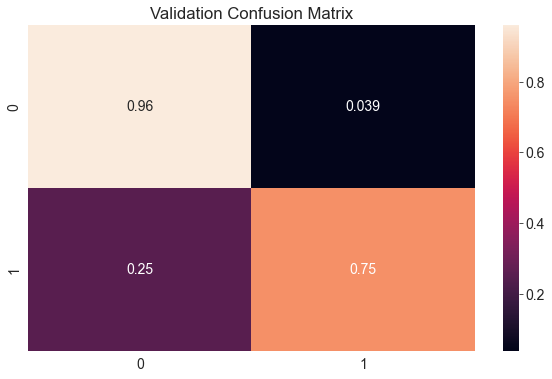

In [116]:
model_performance(model_dtc_best, X_train, train_targets, X_val, val_targets)

From Logistic Regression our validation has increased slightly and we got a minor increase in roc_auc_score as well. Now we may have a look at feature importance of Decision Tree Classifier.

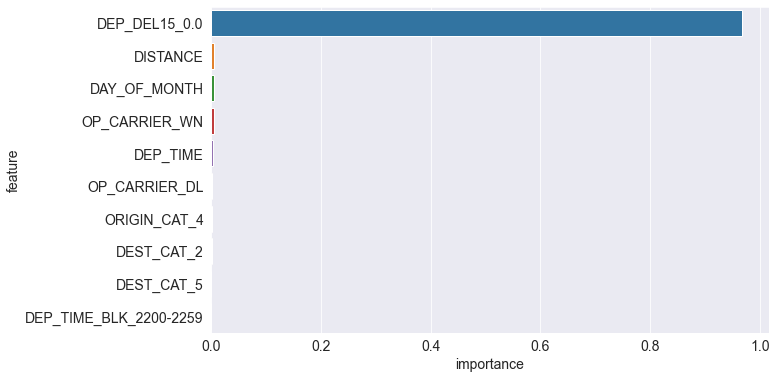

In [117]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_dtc_best.feature_importances_
})
sns.barplot(x = 'importance', y = 'feature', data = importance_df.sort_values('importance', ascending = False).head(10));

Since we can observe a very high influence of 'DEP_DEL15' on prediction, we will look at the performance of another baseline model which predicts delay at arrival same as delay at departure column. 

In [118]:
arr_preds_based_on_dep_delay = val_df['DEP_DEL15']
arr_preds_based_on_dep_delay

717949    0.0
717950    0.0
717951    0.0
717952    0.0
717953    0.0
         ... 
956581    0.0
956582    0.0
956583    0.0
956584    0.0
956585    0.0
Name: DEP_DEL15, Length: 233046, dtype: float64

In [119]:
accuracy_score(val_targets, arr_preds_based_on_dep_delay)

0.9285548775778173

In [120]:
roc_auc_score(val_targets, arr_preds_based_on_dep_delay)

0.857224332675879

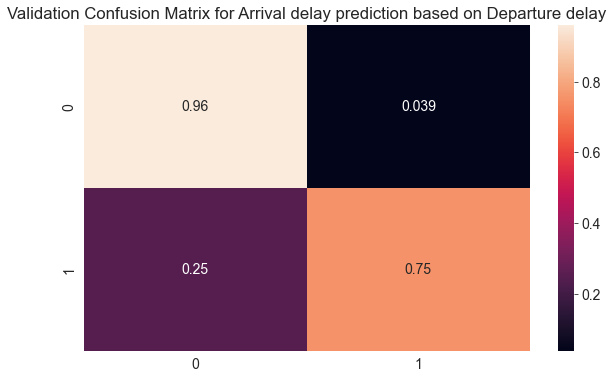

In [121]:
 conf_matrix_arr_based_on_dep_delay =  confusion_matrix(val_targets, arr_preds_based_on_dep_delay, normalize = 'true')
 plt.figure()
 plt.title('Validation Confusion Matrix for Arrival delay prediction based on Departure delay')
 sns.heatmap(conf_matrix_arr_based_on_dep_delay, annot = True);

As above results suggests our Decision Tree Classifier gives almost same performance to the model that just copying the departure delay column. We need to check more algorithms to outperform this baseline model.

## Random Forest Classifier

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
model = RandomForestClassifier(n_jobs = -1, random_state = 42)

Train set accuracy: 99.99%
Validation set Accuracy: 92.42%
Validation Classification report: 
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96    196493
         1.0       0.78      0.72      0.75     36553

    accuracy                           0.92    233046
   macro avg       0.86      0.84      0.85    233046
weighted avg       0.92      0.92      0.92    233046

roc auc score: 0.84


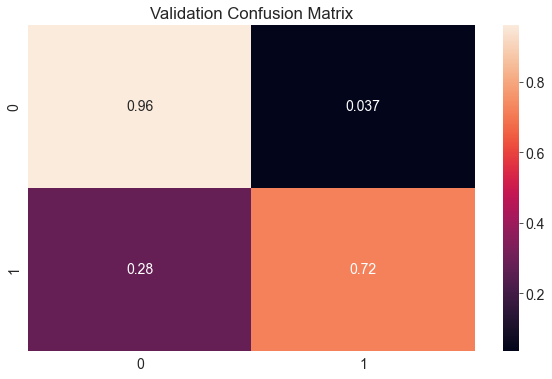

In [125]:
model_performance(model, X_train, train_targets, X_val, val_targets)

The default configuration of Random Forest is not good compared to our best Decision Tree model, and we need to search for optimum hyperparameters.

## Hyperparameter Tuinng for Random Forest Classifier

In [127]:
# function to quickly evaluate effect of different hyperparameters
def test_params_rfc(**params):
    model = RandomForestClassifier(n_jobs = -1, random_state = 42, **params).fit(X_train, train_targets)
    train_accuracy = model.score(X_train, train_targets)
    val_accuracy = model.score(X_val, val_targets)
    roc_auc_score_lr = roc_auc_score(val_targets, model.predict(X_val))
    print('Train set accuracy: {:.2f}%'.format(train_accuracy*100))
    print('Validation set Accuracy: {:.2f}%'.format(val_accuracy* 100))
    print('roc auc score: {:.2f}'.format(roc_auc_score_lr))

Let's look at influence of number of estimators.

In [128]:
test_params_rfc(n_estimators = 5)

Train set accuracy: 98.54%
Validation set Accuracy: 91.35%
roc auc score: 0.82


In [129]:
test_params_rfc(n_estimators = 20)

Train set accuracy: 99.54%
Validation set Accuracy: 92.26%
roc auc score: 0.83


In [130]:
test_params_rfc(n_estimators = 35)

Train set accuracy: 99.87%
Validation set Accuracy: 92.31%
roc auc score: 0.84


In [131]:
test_params_rfc(n_estimators = 50)

Train set accuracy: 99.92%
Validation set Accuracy: 92.38%
roc auc score: 0.84


Now we can check what effect max_depth can make. 

In [132]:
test_params_rfc(n_estimators = 20, max_depth = 5)

Train set accuracy: 91.73%
Validation set Accuracy: 92.83%
roc auc score: 0.86


In [133]:
test_params_rfc(n_estimators = 20, max_depth = 7)

Train set accuracy: 91.75%
Validation set Accuracy: 92.86%
roc auc score: 0.86


In [134]:
test_params_rfc(n_estimators = 20, max_depth = 8)

Train set accuracy: 91.75%
Validation set Accuracy: 92.85%
roc auc score: 0.86


Let's also check effect of max_leaf_nodes.

In [135]:
test_params_rfc(n_estimators = 20, max_leaf_nodes = 32)

Train set accuracy: 91.74%
Validation set Accuracy: 92.84%
roc auc score: 0.86


In [136]:
test_params_rfc(n_estimators = 20, max_leaf_nodes = 64)

Train set accuracy: 91.75%
Validation set Accuracy: 92.86%
roc auc score: 0.86


In [137]:
test_params_rfc(n_estimators = 40, max_leaf_nodes = 128)

Train set accuracy: 91.75%
Validation set Accuracy: 92.86%
roc auc score: 0.86


In [138]:
test_params_rfc(n_estimators = 20, max_leaf_nodes = 256)

Train set accuracy: 91.75%
Validation set Accuracy: 92.86%
roc auc score: 0.86


Now we will check min_samples_leaf and its effect.

In [139]:
test_params_rfc(n_estimators = 20, min_samples_leaf = 2)

Train set accuracy: 93.90%
Validation set Accuracy: 92.84%
roc auc score: 0.85


In [140]:
test_params_rfc(n_estimators = 20, min_samples_leaf = 4)

Train set accuracy: 92.39%
Validation set Accuracy: 92.87%
roc auc score: 0.85


In [141]:
test_params_rfc(n_estimators = 20, min_samples_leaf = 8)

Train set accuracy: 91.94%
Validation set Accuracy: 92.88%
roc auc score: 0.86


It would be helpful if we check effect of hyperparameter min_samples_split.

In [142]:
test_params_rfc(n_estimators = 20, min_samples_split = 8)

Train set accuracy: 94.12%
Validation set Accuracy: 92.79%
roc auc score: 0.85


In [143]:
test_params_rfc(n_estimators = 20, min_samples_split = 50)

Train set accuracy: 91.99%
Validation set Accuracy: 92.87%
roc auc score: 0.86


In [144]:
test_params_rfc(n_estimators = 20, min_samples_split = 25)

Train set accuracy: 92.37%
Validation set Accuracy: 92.87%
roc auc score: 0.85


In [145]:
model_rfc_best = RandomForestClassifier(n_jobs = -1, random_state = 42, n_estimators = 20, min_samples_leaf = 8)

Train set accuracy: 91.94%
Validation set Accuracy: 92.88%
Validation Classification report: 
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96    196493
         1.0       0.79      0.75      0.77     36553

    accuracy                           0.93    233046
   macro avg       0.87      0.86      0.86    233046
weighted avg       0.93      0.93      0.93    233046

roc auc score: 0.86


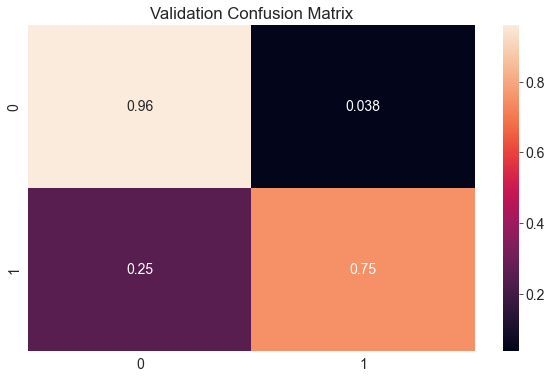

In [146]:
model_performance(model_rfc_best, X_train, train_targets, X_val, val_targets)

We could only able to achieve a marginal increase in performance compared to model that copies departure delays.

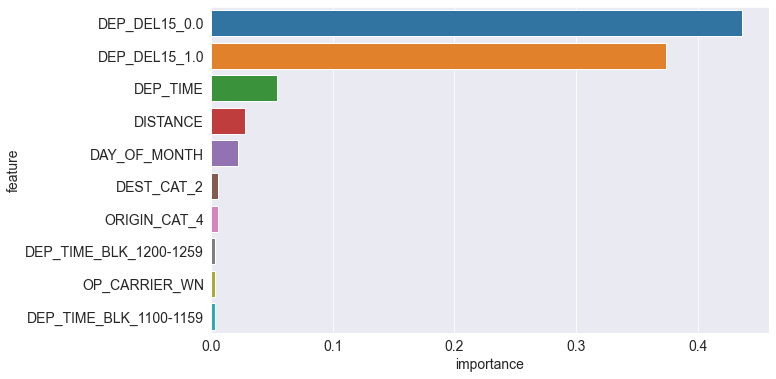

In [147]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_rfc_best.feature_importances_
})
sns.barplot(x = 'importance', y = 'feature', data = importance_df.sort_values('importance', ascending = False).head(10));

By examining the feature importance we can understand that the Random Forest model is best as it depends on many features for prediction unlike Decision Tree model which mostly depends on one feature. we can hope our Random Forest will perform better to unknown data.

# XGBoost Classifier

In [148]:
from xgboost import XGBClassifier

In [149]:
model = XGBClassifier(random_state=42, n_jobs = -1,use_label_encoder=False, eval_metric = 'logloss')

Train set accuracy: 92.26%
Validation set Accuracy: 92.96%
Validation Classification report: 
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96    196493
         1.0       0.81      0.72      0.76     36553

    accuracy                           0.93    233046
   macro avg       0.88      0.84      0.86    233046
weighted avg       0.93      0.93      0.93    233046

roc auc score: 0.84


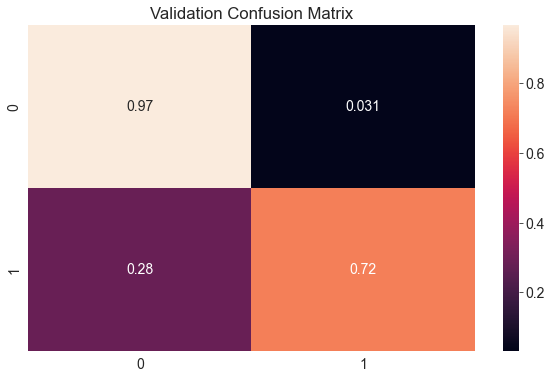

In [150]:
model_performance(model, X_train, train_targets, X_val, val_targets)

From the above performance data we can see that clearly performance on validation set is increased but the roc_auc_score is decreased.

# Hyperparameter Tuning for XGBClassifier

In [151]:
# function to quickly evaluate effect of different hyperparameters
def test_params_xgbc(**params):
    model = XGBClassifier(random_state=42, n_jobs = -1,use_label_encoder=False, eval_metric = 'logloss', **params).fit(X_train, train_targets)
    train_accuracy = model.score(X_train, train_targets)
    val_accuracy = model.score(X_val, val_targets)
    roc_auc_score_lr = roc_auc_score(val_targets, model.predict(X_val))
    print('Train set accuracy: {:.2f}%'.format(train_accuracy*100))
    print('Validation set Accuracy: {:.2f}%'.format(val_accuracy* 100))
    print('roc auc score: {:.2f}'.format(roc_auc_score_lr))

Let's check effect of number of estimators.

In [152]:
test_params_xgbc(n_estimators = 10)

Train set accuracy: 91.78%
Validation set Accuracy: 92.87%
roc auc score: 0.86


In [153]:
test_params_xgbc(n_estimators = 20)

Train set accuracy: 91.87%
Validation set Accuracy: 92.89%
roc auc score: 0.85


In [154]:
test_params_xgbc(n_estimators = 30)

Train set accuracy: 91.94%
Validation set Accuracy: 92.91%
roc auc score: 0.85


In [155]:
test_params_xgbc(n_estimators = 50)

Train set accuracy: 92.09%
Validation set Accuracy: 92.96%
roc auc score: 0.85


Now let's check max_depth.

In [156]:
test_params_xgbc(n_estimators = 10, max_depth = 5)

Train set accuracy: 91.77%
Validation set Accuracy: 92.86%
roc auc score: 0.86


In [157]:
test_params_xgbc(n_estimators = 10, max_depth = 10)

Train set accuracy: 92.13%
Validation set Accuracy: 92.91%
roc auc score: 0.85


In [158]:
test_params_xgbc(n_estimators = 10, max_depth = 20)

Train set accuracy: 94.63%
Validation set Accuracy: 92.54%
roc auc score: 0.84


We can also explore learning_rate's effect on predictions.

In [159]:
test_params_xgbc(n_estimators = 10, learning_rate = 0.2)

Train set accuracy: 91.76%
Validation set Accuracy: 92.86%
roc auc score: 0.86


In [160]:
test_params_xgbc(n_estimators = 10, learning_rate = 0.3)

Train set accuracy: 91.78%
Validation set Accuracy: 92.87%
roc auc score: 0.86


In [161]:
test_params_xgbc(n_estimators = 10, learning_rate = 0.4)

Train set accuracy: 91.85%
Validation set Accuracy: 92.90%
roc auc score: 0.86


In [162]:
test_params_xgbc(n_estimators = 10, learning_rate = 0.5)

Train set accuracy: 91.89%
Validation set Accuracy: 92.92%
roc auc score: 0.85


In [163]:
test_params_xgbc(n_estimators = 40, max_depth = 7, learning_rate = 0.3)

Train set accuracy: 92.13%
Validation set Accuracy: 92.95%
roc auc score: 0.85


In [164]:
test_params_xgbc(n_estimators = 50, max_depth = 7, learning_rate = 0.3)

Train set accuracy: 92.20%
Validation set Accuracy: 92.96%
roc auc score: 0.85


In [165]:
model_xgbc_best = XGBClassifier(n_estimators = 50, max_depth = 7, learning_rate = 0.3, random_state=42, n_jobs = -1,use_label_encoder=False, eval_metric = 'logloss')

Train set accuracy: 92.20%
Validation set Accuracy: 92.96%
Validation Classification report: 
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96    196493
         1.0       0.81      0.73      0.76     36553

    accuracy                           0.93    233046
   macro avg       0.88      0.85      0.86    233046
weighted avg       0.93      0.93      0.93    233046

roc auc score: 0.85


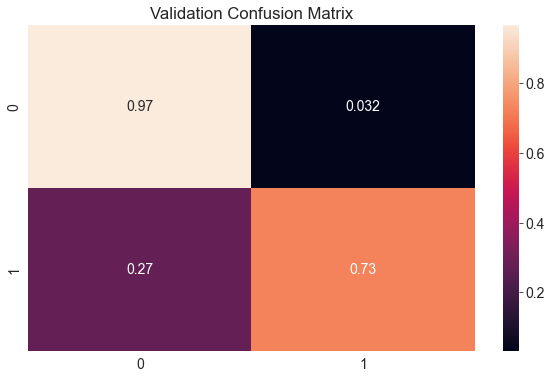

In [166]:
model_performance(model_xgbc_best, X_train, train_targets, X_val, val_targets)

With gradient boosting algorithm of XGBoost we could achieve better accuracy on validation set, but for the highest of accuracy model, roc_auc_score is less compared to earlier models. For this reason we will select one more best model from XGBoost classifier to checck performance on test data.

In [167]:
model_xgbc_best2 = XGBClassifier(n_estimators = 10, learning_rate = 0.4, random_state=42, n_jobs = -1,use_label_encoder=False, eval_metric = 'logloss')

Train set accuracy: 91.85%
Validation set Accuracy: 92.90%
Validation Classification report: 
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96    196493
         1.0       0.79      0.75      0.77     36553

    accuracy                           0.93    233046
   macro avg       0.87      0.86      0.86    233046
weighted avg       0.93      0.93      0.93    233046

roc auc score: 0.86


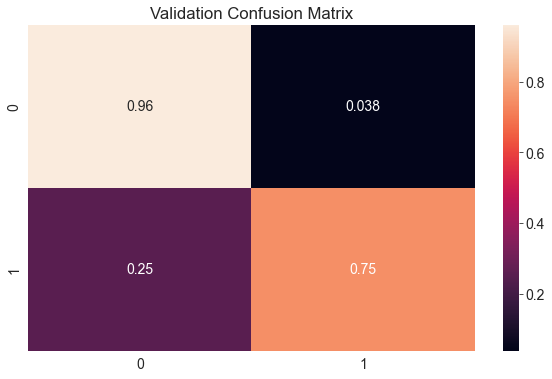

In [168]:
model_performance(model_xgbc_best2, X_train, train_targets, X_val, val_targets)

# Making Predictions on New Inputs

To predict delay on arrival for a single input (details of a single trip) we can write a function as follows. The two dictionaries, origin_cat_dict and dest_cat_dict are used for getting corresponding category for origin and destination airports.

In [169]:
# function to predict sample input
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df['ORIGIN_CAT'] = origin_cat_dict[single_input['ORIGIN']]
    input_df['DEST_CAT'] = dest_cat_dict[single_input['DEST']]
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

A single input by the name new_input is shown below.

In [170]:
new_input = {'DAY_OF_MONTH': 3,
             'DAY_OF_WEEK': 2,
             'OP_CARRIER': '9E',
             'ORIGIN': 'ATL',
             'DEST': 'LGA',
             'DEP_TIME': 1225.0,
             'DEP_DEL15': 0.0,
             'DEP_TIME_BLK': '1200-1259',
             'DISTANCE': 578.0 }

We use above function for prediction of arrival delay for the given input. We will use the logistic regression model named model_lr.

In [171]:
predict_input(model_lr, new_input)

(0.0, 0.9451716549447228)

The model is predicting no delay (indicated by 0.0) with 0.94 probability.

# Compare different models on Test Data

In [172]:
model_lr = LogisticRegression(solver = 'liblinear', random_state = 42)
model_dtc_best = DecisionTreeClassifier(max_depth = 7, max_leaf_nodes = 128, min_samples_leaf = 5, random_state=42)
model_rfc_best = RandomForestClassifier(n_jobs = -1, random_state = 42, n_estimators = 20, min_samples_leaf = 8)
model_xgbc_best = XGBClassifier(n_estimators = 50, max_depth = 7, learning_rate = 0.3, random_state=42, n_jobs = -1,
                                use_label_encoder=False, eval_metric = 'logloss')
model_xgbc_best2 = XGBClassifier(n_estimators = 10, learning_rate = 0.4, random_state=42, n_jobs = -1,use_label_encoder=False, eval_metric = 'logloss')

In [173]:
models = [model_lr, model_dtc_best, model_rfc_best, model_xgbc_best, model_xgbc_best2]
accuracy_scores = []
roc_auc_scores = []

In [174]:
for model in models:
  model.fit(X_train, train_targets)
  test_preds = model.predict(X_test)
  test_accuracy = accuracy_score(test_targets, test_preds)
  roc_auc_score_test = roc_auc_score(test_targets, test_preds)
  accuracy_scores.append(round(test_accuracy*100, 2))
  roc_auc_scores.append(round(roc_auc_score_test, 3))

In [175]:
test_results_df = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'XGBoost Classifier_1', 'XGBoost Classifier_2'],
    'Accuracy': accuracy_scores,
    'roc_auc_score': roc_auc_scores
})

In [176]:
test_results_df

,Model,Accuracy,roc_auc_score
0,Logistic Regression,94.22,0.849
1,Decision Tree Classifier,94.25,0.850
2,Random Forest Classifier,94.25,0.850
3,XGBoost Classifier_1,94.40,0.843
4,XGBoost Classifier_2,94.29,0.850


Let's also add the model which predicts arrival delay purely by copying departure delay to the above dataframe to compare with our models.

In [177]:
test_dep_delay = test_df['DEP_DEL15']

In [178]:
accuracy_copy_model = round(accuracy_score(test_targets, test_dep_delay)*100, 2)

In [179]:
roc_auc_copy_model = round(roc_auc_score(test_targets, test_dep_delay), 3)

In [180]:
test_results_df.loc[5] = ['Departure Delay Copy Model', accuracy_copy_model, roc_auc_copy_model]

In [181]:
test_results_df

,Model,Accuracy,roc_auc_score
0,Logistic Regression,94.22,0.849
1,Decision Tree Classifier,94.25,0.850
2,Random Forest Classifier,94.25,0.850
3,XGBoost Classifier_1,94.40,0.843
4,XGBoost Classifier_2,94.29,0.850
5,Departure Delay Copy Model,94.24,0.850


It turns out that the XGBoost classifier model performs the best in terms of accuracy compared to other models.And this model loses roc_auc_score by a small value compared to others. 

# Saving and Loading Trained Models

Now we will save check performance of our best model and save the model weights and other required items for future use,

In [182]:
model_best = XGBClassifier(n_estimators = 50, max_depth = 7, learning_rate = 0.3, random_state=42, n_jobs = -1,
                                use_label_encoder=False, eval_metric = 'logloss')

In [183]:
model_best.fit(X_train, train_targets)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=7, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, ...)

Train set Accuracy: 92.20%
Validation set Accuracy: 92.96%
Test set Accuracy: 94.40%
roc auc score on Test data: 0.84


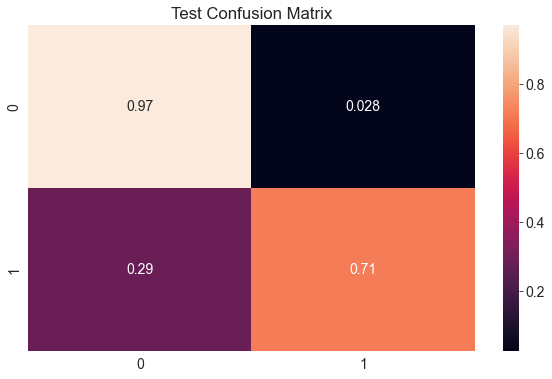

In [184]:
train_preds = model_best.predict(X_train)
val_preds = model_best.predict(X_val)
test_preds = model_best.predict(X_test)
train_accuracy = accuracy_score(train_targets, train_preds)
val_accuracy = accuracy_score(val_targets, val_preds)
test_accuracy = accuracy_score(test_targets, test_preds)
print('Train set Accuracy: {:.2f}%'.format(train_accuracy*100))
print('Validation set Accuracy: {:.2f}%'.format(val_accuracy* 100))
print('Test set Accuracy: {:.2f}%'.format(test_accuracy* 100))
print('roc auc score on Test data: {:.2f}'.format(roc_auc_score(test_targets, test_preds)))  
conf_matrix =  confusion_matrix(test_targets, test_preds, normalize = 'true')
plt.figure()
plt.title('Test Confusion Matrix')
sns.heatmap(conf_matrix, annot = True);

We can use the joblib module to save and load Python objects on the disk.

In [185]:
import joblib

In [186]:
flight_arrival_delay_prediction = {
    'model': model_best,
    'origin_cat': origin_cat_dict,
    'dest_cat': dest_cat_dict,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [187]:
joblib.dump(flight_arrival_delay_prediction, 'flight_arrival_delay_prediction.joblib')

['flight_arrival_delay_prediction.joblib']

Now let's load this model and check on new_input

In [188]:
flight_delay_2 = joblib.load('flight_arrival_delay_prediction.joblib')

In [189]:
predict_input(flight_delay_2['model'], new_input)

(0, 0.9535309)

So our loaded best model is predicting no delay on arrival airport for single input with 0.95 probability.